**WHAT ARE GOOD PREDICTORS OF RUNNING PACE?**

*UCSanDiegoX DSE200x Python for Data Science Final Project*

Author : Andrea Valente

Date: June, 2022

# Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
from pandas.plotting import scatter_matrix

# Helper functions

In [3]:
def list_element_to_int(my_list:list):
    """
    returns elements of a list as integers
    """
    try:
        res = [int(x) for x in my_list]
        if len(res) > 2:
            return res[0] * 3600 + res[1] * 60 + res[2]
        else:
            return res[0] * 60 + res[1]
    except Exception as e:
        return np.nan

In [4]:
def hms_to_secs(time: pd.Series):
    """
    Converts time in the h:m:s format to seconds using the list_element_to_int fun
    """
    temp = time.apply(lambda x: x.split('.')[0]) # remove decimals (all after .)  
    temp2 = temp.str.split(':')
    return temp2.apply(lambda x: list_element_to_int(x))

How to write a function that takes a string and can be applied to pandas Series (df column)

# Load data

In [5]:
rundata = pd.read_csv('data/Activities.csv')
print('Shape of running dataset: ' + str(rundata.shape))

Shape of running dataset: (569, 39)


In [125]:
rundata.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Place,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,Appiano,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,Appiano,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-11 13:35:38,Appiano Gentile Corsa,0.74,70,00:05:00.6,169,180,156,160,6:47,6:10,--,2,0.94,05:00.57.1,00:04:59,00:05:00.6,338,341,Appiano,2020-10-11,0.459815,300,407,370,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-12 18:45:11,Appiano Gentile Corsa,1.20,104,00:08:00.9,160,179,156,160,6:40,4:28,7,18,0.96,01:21.13.3,00:07:58.7,00:08:00.9,339,356,Appiano,2020-10-12,0.745645,480,400,268,18,10,2020-10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-12 18:58:32,Appiano Gentile Corsa,1.13,113,00:08:00.9,171,187,152,156,7:05,5:23,7,8,0.93,00:54.06.9,00:07:58.9,00:08:00.9,338,347,Appiano,2020-10-12,0.702149,480,425,323,18,10,2020-10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prepare and analyze

## Set columns

In [10]:
cols = ['Date','Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length',
       'Best Lap Time', 'Moving Time',
       'Elapsed Time', 'Min Elevation', 'Max Elevation'] #'Aerobic TE',

In [11]:
rundata = rundata[cols]

In [12]:
rundata.head()

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,2022-06-11 15:06:15,Reading - Easy Run,5.77,422,00:40:01,160,184,156,163,6:56,5:40,2,8,0.92,02:26.11.9,00:39:54,00:40:44,35,49
1,2022-06-08 18:53:49,Reading - Stride Repeats,4.01,265,00:27:38,139,170,151,196,6:54,4:19,11,15,0.96,00:13.68.2,00:27:24,00:28:05,37,48
2,2022-06-06 18:16:58,Reading - Easy Run,5.78,423,00:40:00,161,184,156,163,6:55,6:27,8,15,0.93,03:12.57,00:39:47,00:40:11,33,58
3,2022-06-04 16:52:57,Benchmark Run,1.43,83,00:09:05.4,140,155,162,188,6:20,5:06,--,--,0.96,00:05.36.7,00:09:00,00:09:07.0,--,--
4,2022-06-02 18:06:53,Reading Running,5.23,380,00:38:03,152,176,155,161,7:16,6:40,--,--,0.89,01:38.44.5,00:37:55,00:38:44,37,40


In [13]:
rundata.Title.value_counts()

Reading Running                         66
Reading - Easy Run                      50
Appiano Gentile Running                 38
Reading Corsa                           35
Reading - Negative Split Run            18
Appiano Gentile - Easy Run              17
Reading - Tired Run                     14
Reading - Cadence Drills                 7
Paralimni Running                        7
Appiano Gentile Corsa                    7
Reading - Stride Repeats                 6
Reading - Hill Repeats                   5
Reading - Pace Run                       5
Appiano Gentile - Stride Repeats         5
Appiano Gentile - Hill Repeats           4
Reading - Benchmark Run                  4
Appiano Gentile - Progression Run        4
Reading - Steady State Run               4
Appiano Gentile - Steady State Run       3
Appiano Gentile - Tired Run              3
Reading - Progression Run                3
Appiano Gentile - Negative Split Run     3
Reading - Tempo Run                      3
Appiano Gen

In [14]:
rundata['Place'] = np.where(rundata['Title'].str.contains('Reading'),'Reading',
                           np.where(rundata['Title'].str.contains('Appiano'),'Appiano',
                                   np.where(rundata['Title'].str.contains('Trieste'),'Trieste','Other')))

In [15]:
rundata['Place'].value_counts()

Reading    227
Appiano     99
Other        9
Trieste      3
Name: Place, dtype: int64

## Check data types

In [16]:
rundata.dtypes

Date                  object
Title                 object
Distance             float64
Calories              object
Time                  object
Avg HR                 int64
Max HR                 int64
Avg Run Cadence        int64
Max Run Cadence        int64
Avg Pace              object
Best Pace             object
Total Ascent          object
Total Descent         object
Avg Stride Length    float64
Best Lap Time         object
Moving Time           object
Elapsed Time          object
Min Elevation         object
Max Elevation         object
Place                 object
dtype: object

In [17]:
rundata['Short_date'] = rundata['Date'].str[0:10]

In [18]:
rundata['Date'] = pd.to_datetime(rundata['Date'], infer_datetime_format=True)

In [19]:
rundata.sort_values(by=['Date'],inplace=True)

In [20]:
rundata['Calories'] = rundata['Calories'].replace(',','',regex=True).astype(int)

## Add new columns

In [21]:
rundata['Distance_in_miles'] = (rundata['Distance'] / 1.609344)

In [22]:
rundata['Time_in_secs'] = hms_to_secs(rundata['Time'])

In [23]:
rundata['Avg_pace_secs'] = hms_to_secs(rundata['Avg Pace'])  

In [127]:
rundata[['Avg Pace','Avg_pace_secs']].sample(5)

,Avg Pace,Avg_pace_secs
317,6:58,418
217,6:48,408
253,6:25,385
33,6:37,397
285,6:51,411


In [24]:
rundata['Best_pace_secs'] = hms_to_secs(rundata['Best Pace'])  

In [25]:
rundata['Hour_of_day'] = rundata['Date'].dt.hour

In [26]:
rundata['Month'] = rundata['Date'].dt.month.astype(str)

In [27]:
rundata['Month_Year'] = rundata['Date'].dt.to_period('M')

In [28]:
rundata['Day_of_week'] = rundata['Date'].dt.dayofweek

In [29]:
rundata['Short_date'] = pd.to_datetime(rundata['Short_date'])

In [30]:
# moving averages pace
rundata['Pace_MA_7'] = rundata['Avg_pace_secs'].rolling(7).mean()
rundata['Pace_MA_30'] = rundata['Avg_pace_secs'].rolling(30).mean()

In [31]:
# moving averages distance
rundata['Distance_MA_7'] = rundata['Distance'].rolling(7).mean()
rundata['Distance_MA_30'] = rundata['Distance'].rolling(30).mean()
rundata['Distance_MA_60'] = rundata['Distance'].rolling(60).mean()

In [32]:
# heart rate moving averages
rundata['Avg_HR_MA_7'] = rundata['Avg HR'].rolling(7).mean()
rundata['Avg_HR_MA_30'] = rundata['Avg HR'].rolling(30).mean()
rundata['Avg_HR_MA_60'] = rundata['Avg HR'].rolling(60).mean()

In [33]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Place,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
337,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,Appiano,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,Appiano,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
rundata.sort_values(by =['Date'],inplace=True)

In [35]:
rundata.reset_index(drop=True,inplace=True)

In [36]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Place,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,Appiano,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,Appiano,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fix dtypes

In [37]:
rundata.dtypes

Date                 datetime64[ns]
Title                        object
Distance                    float64
Calories                      int32
Time                         object
Avg HR                        int64
Max HR                        int64
Avg Run Cadence               int64
Max Run Cadence               int64
Avg Pace                     object
Best Pace                    object
Total Ascent                 object
Total Descent                object
Avg Stride Length           float64
Best Lap Time                object
Moving Time                  object
Elapsed Time                 object
Min Elevation                object
Max Elevation                object
Place                        object
Short_date           datetime64[ns]
Distance_in_miles           float64
Time_in_secs                  int64
Avg_pace_secs                 int64
Best_pace_secs                int64
Hour_of_day                   int64
Month                        object
Month_Year                pe

In [38]:
rundata['Hour_of_day'] = rundata['Hour_of_day'].astype(str)
rundata['Day_of_week'] = rundata['Day_of_week'].astype(str)

Min/Max elevation have "--" when not available. We need to replace them before converting to int

In [39]:
rundata['Min Elevation'].unique()

array(['339', '338', '39', '40', '38', '36', '342', '341', '332', '334',
       '340', '35', '34', '1', '6', '-1', '33', '11', '29', '333', '331',
       '30', '175', '4', '--', '32', '26', '330', '37', '31', '28', '20',
       '21', '25', '24', '-44'], dtype=object)

In [40]:
rundata['Total Descent'].unique()

array(['17', '7', '2', '18', '8', '9', '33', '4', '--', '3', '6', '1',
       '5', '11', '10', '15', '12', '16', '0', '13', '19', '21', '20',
       '23', '25', '22', '24', '26', '41', '27', '34', '42', '32', '44',
       '55', '36', '47', '30', '14', '43', '49', '37', '39', '29', '60',
       '35', '45', '31', '28', '64', '61', '54', '38', '50', '56', '53',
       '117', '52', '77', '72', '66', '57', '40', '74', '94', '87'],
      dtype=object)

In [41]:
rundata['Max Elevation'].unique()

array(['357', '346', '341', '356', '347', '349', '42', '43', '44', '45',
       '40', '46', '348', '350', '358', '47', '48', '52', '58', '51',
       '84', '60', '53', '54', '70', '65', '14', '26', '27', '57', '77',
       '64', '63', '50', '71', '49', '61', '68', '59', '87', '365', '351',
       '91', '56', '67', '72', '188', '36', '38', '37', '66', '69', '120',
       '62', '106', '55', '79', '78', '92', '75', '83', '95', '--'],
      dtype=object)

In [42]:
rundata['Min Elevation'] =rundata['Min Elevation'].replace("--",0)
rundata['Max Elevation'] =rundata['Max Elevation'].replace("--",0)

In [43]:
rundata['Min Elevation'] = rundata['Min Elevation'].astype(int)
rundata['Max Elevation'] = rundata['Max Elevation'].astype(int)

In [44]:
rundata['Total Descent'] = rundata['Total Descent'].replace("--",0)
rundata['Total Descent'] = rundata['Total Descent'].astype(int)

## List descriptive columns to facilitate visualization

In [45]:
desc_cols = ['Distance','Avg HR','Total Descent','Max HR','Avg Run Cadence','Max Run Cadence','Avg Stride Length',
            'Time_in_secs','Avg_pace_secs','Hour_of_day','Calories','Best_pace_secs']

## Check correlations

In [46]:
corr = rundata[desc_cols].corr(method='pearson')

In [47]:
corr.style.background_gradient(cmap='coolwarm')

,Distance,Avg HR,Total Descent,Max HR,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Time_in_secs,Avg_pace_secs,Calories,Best_pace_secs
Distance,1.000000,0.265519,0.553256,0.286611,-0.126004,0.060453,-0.550956,0.995965,0.547472,0.988088,0.411419
Avg HR,0.265519,1.000000,0.093447,0.846196,0.045824,-0.206071,-0.351922,0.267221,0.272334,0.346536,0.257532
Total Descent,0.553256,0.093447,1.000000,0.154745,-0.074085,0.117845,-0.356215,0.548335,0.346012,0.539043,0.160540
Max HR,0.286611,0.846196,0.154745,1.000000,-0.005476,-0.125428,-0.310999,0.278738,0.253109,0.354098,0.264442
Avg Run Cadence,-0.126004,0.045824,-0.074085,-0.005476,1.000000,-0.002581,0.165424,-0.159045,-0.526402,-0.115882,-0.028526
Max Run Cadence,0.060453,-0.206071,0.117845,-0.125428,-0.002581,1.000000,0.215274,0.034981,-0.188866,0.028260,-0.242994
Avg Stride Length,-0.550956,-0.351922,-0.356215,-0.310999,0.165424,0.215274,1.000000,-0.584098,-0.915071,-0.598182,-0.407073
Time_in_secs,0.995965,0.267221,0.548335,0.278738,-0.159045,0.034981,-0.584098,1.000000,0.593762,0.990010,0.418043
Avg_pace_secs,0.547472,0.272334,0.346012,0.253109,-0.526402,-0.188866,-0.915071,0.593762,1.000000,0.587489,0.373887
Calories,0.988088,0.346536,0.539043,0.354098,-0.115882,0.028260,-0.598182,0.990010,0.587489,1.000000,0.422882


## Plot correlations

In [48]:
corr_cols = ['Distance','Avg HR','Avg Run Cadence','Avg Stride Length',
            'Time_in_secs','Avg_pace_secs','Calories','Best_pace_secs']

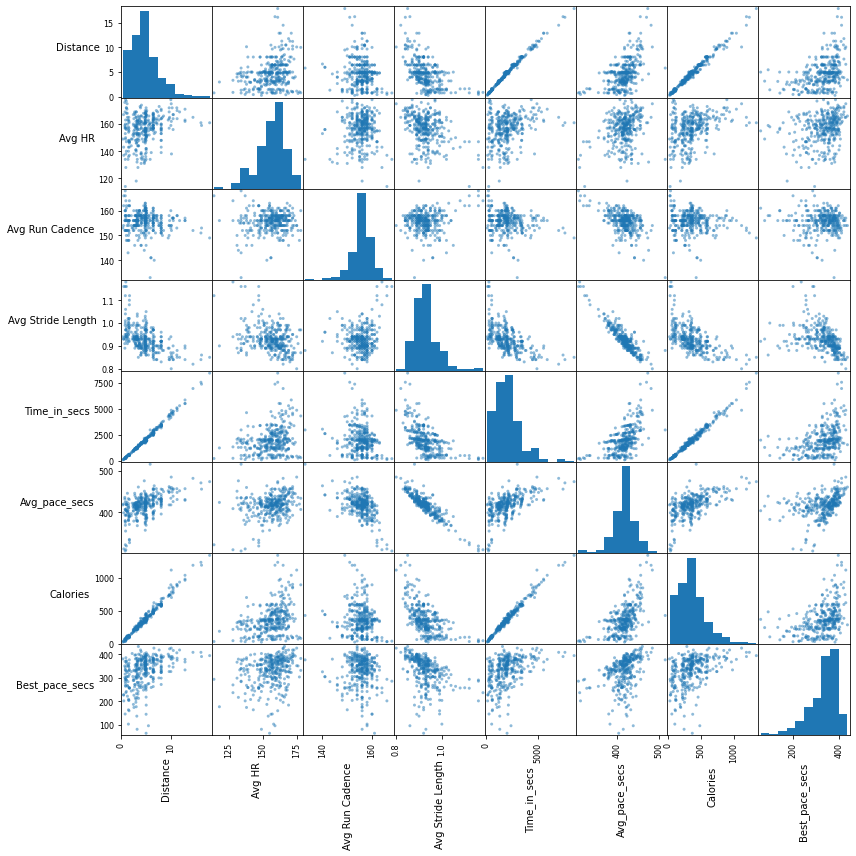

In [49]:
axes = scatter_matrix(rundata[corr_cols], figsize=(12, 12))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [50]:
rundata[desc_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,338.0,4.773136,2.844567,0.3,3.00,4.83,6.44,17.85
Avg HR,338.0,156.369822,10.678297,114.0,151.00,157.50,164.00,178.00
Total Descent,338.0,20.485207,17.293283,0.0,8.00,15.00,29.00,117.00
Max HR,338.0,176.727811,11.633748,131.0,170.25,179.00,185.00,205.00
Avg Run Cadence,338.0,155.562130,4.018944,133.0,154.00,156.00,158.00,168.00
Max Run Cadence,338.0,166.582840,9.080612,152.0,162.00,164.00,169.00,240.00
Avg Stride Length,338.0,0.928521,0.054725,0.8,0.90,0.92,0.95,1.18
Time_in_secs,338.0,2031.976331,1299.007749,125.0,1219.75,1908.00,2632.25,8462.00
Avg_pace_secs,338.0,417.029586,26.748843,307.0,405.00,419.00,432.00,516.00
Calories,338.0,363.997041,223.292618,21.0,225.25,341.00,468.75,1340.00


In [51]:
rundata.head(2)

,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Place,Short_date,Distance_in_miles,Time_in_secs,Avg_pace_secs,Best_pace_secs,Hour_of_day,Month,Month_Year,Day_of_week,Pace_MA_7,Pace_MA_30,Distance_MA_7,Distance_MA_30,Distance_MA_60,Avg_HR_MA_7,Avg_HR_MA_30,Avg_HR_MA_60
0,2020-10-11 13:19:38,Appiano Gentile Corsa,0.85,61,00:05:00.0,150,173,160,164,5:55,4:24,--,17,1.06,05:00.02.3,00:04:59,00:05:00.0,339,357,Appiano,2020-10-11,0.528166,300,355,264,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-11 13:27:38,Appiano Gentile Corsa,0.79,62,00:05:00.4,153,167,158,160,6:19,5:35,5,7,1.00,05:00.37.7,00:04:59,00:05:00.4,339,346,Appiano,2020-10-11,0.490883,300,379,335,13,10,2020-10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plots

## Average pace wit moving averages

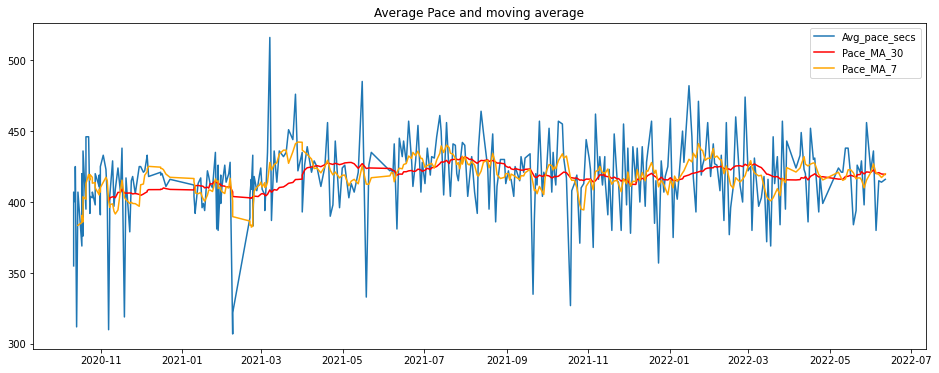

In [52]:
plt.figure(figsize=(16,6))
plt.title("Average Pace and moving average")
plt.plot(rundata['Date'],rundata['Avg_pace_secs'],label='avg pace')
plt.plot(rundata['Date'],rundata['Pace_MA_30'],label='mov avg 30', color='red') #linestyle="-."
plt.plot(rundata['Date'],rundata['Pace_MA_7'],label='mov avg 7',color='orange')
plt.legend(['Avg_pace_secs','Pace_MA_30','Pace_MA_7'])
plt.show()

## Distance with moving average

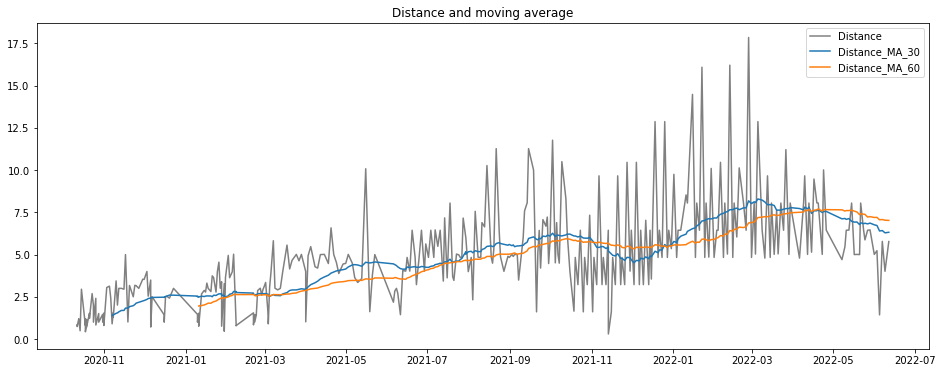

In [53]:
plt.figure(figsize=(16,6))
plt.title("Distance and moving average")
plt.plot(rundata['Date'],rundata['Distance'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Distance_MA_30'],label = 'MA 30 days')
plt.plot(rundata['Date'],rundata['Distance_MA_60'],label = 'MA 60 days')
plt.legend(['Distance','Distance_MA_30','Distance_MA_60'])
plt.show()

## HR with moving average

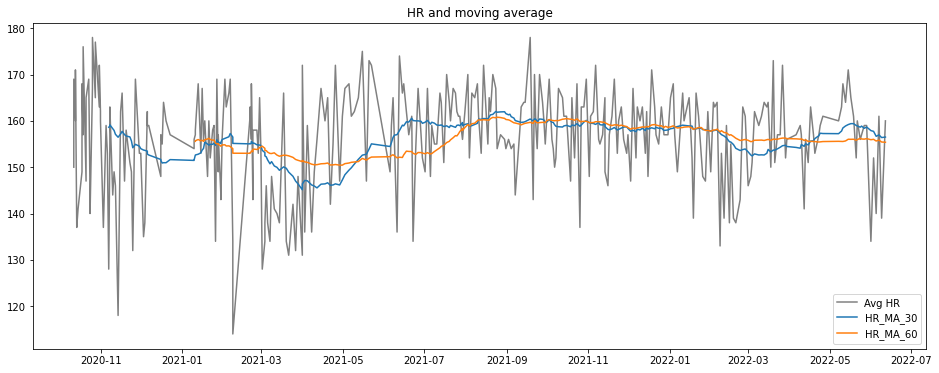

In [54]:
plt.figure(figsize=(16,6))
plt.title("HR and moving average")
plt.plot(rundata['Date'],rundata['Avg HR'],label='distance',color='grey')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_30'],label = 'HR 30 days')
plt.plot(rundata['Date'],rundata['Avg_HR_MA_60'],label = 'HR 60 days')
plt.legend(['Avg HR','HR_MA_30','HR_MA_60'])
plt.show()

## Histogram of average pace

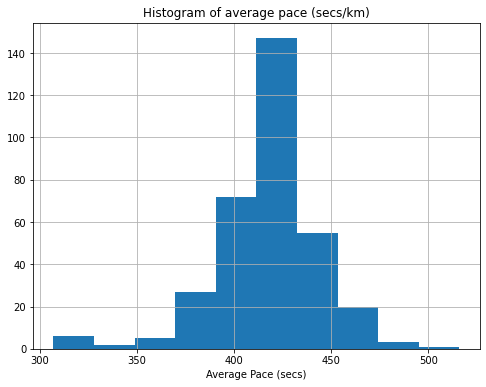

In [55]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average pace (secs/km)')
plt.xlabel('Average Pace (secs)')
plt.hist(rundata['Avg_pace_secs'])
plt.grid()
plt.show()

## Histogram of HR

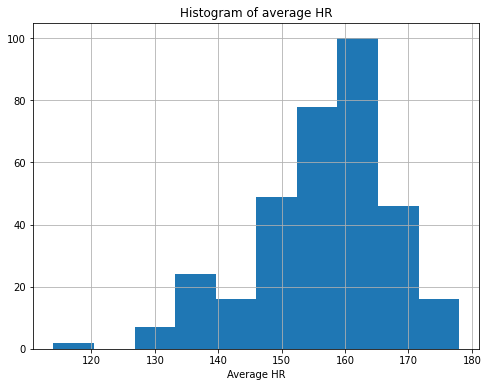

In [56]:
plt.figure(figsize=(8,6))
plt.title('Histogram of average HR')
plt.xlabel('Average HR')
plt.hist(rundata['Avg HR'])
plt.grid()
plt.show()

In [57]:
rundata[desc_cols].corr()

,Distance,Avg HR,Total Descent,Max HR,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Time_in_secs,Avg_pace_secs,Calories,Best_pace_secs
Distance,1.000000,0.265519,0.553256,0.286611,-0.126004,0.060453,-0.550956,0.995965,0.547472,0.988088,0.411419
Avg HR,0.265519,1.000000,0.093447,0.846196,0.045824,-0.206071,-0.351922,0.267221,0.272334,0.346536,0.257532
Total Descent,0.553256,0.093447,1.000000,0.154745,-0.074085,0.117845,-0.356215,0.548335,0.346012,0.539043,0.160540
Max HR,0.286611,0.846196,0.154745,1.000000,-0.005476,-0.125428,-0.310999,0.278738,0.253109,0.354098,0.264442
Avg Run Cadence,-0.126004,0.045824,-0.074085,-0.005476,1.000000,-0.002581,0.165424,-0.159045,-0.526402,-0.115882,-0.028526
Max Run Cadence,0.060453,-0.206071,0.117845,-0.125428,-0.002581,1.000000,0.215274,0.034981,-0.188866,0.028260,-0.242994
Avg Stride Length,-0.550956,-0.351922,-0.356215,-0.310999,0.165424,0.215274,1.000000,-0.584098,-0.915071,-0.598182,-0.407073
Time_in_secs,0.995965,0.267221,0.548335,0.278738,-0.159045,0.034981,-0.584098,1.000000,0.593762,0.990010,0.418043
Avg_pace_secs,0.547472,0.272334,0.346012,0.253109,-0.526402,-0.188866,-0.915071,0.593762,1.000000,0.587489,0.373887
Calories,0.988088,0.346536,0.539043,0.354098,-0.115882,0.028260,-0.598182,0.990010,0.587489,1.000000,0.422882


[Text(0.5, 1.0, 'Avg Pace vs Distance')]

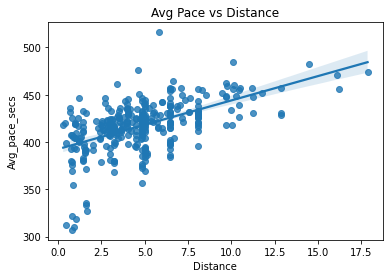

In [58]:
sns.regplot(x='Distance',y='Avg_pace_secs',data=rundata, fit_reg=True).set(title='Avg Pace vs Distance')

## Histogram of Avg Run Cadence

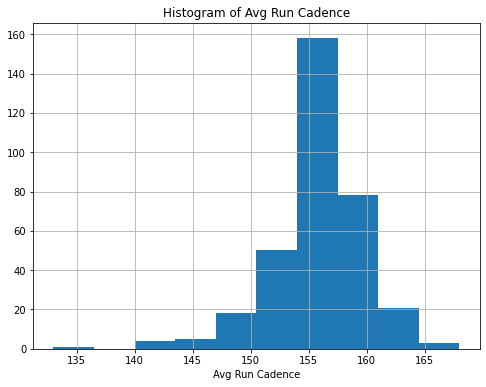

In [59]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Avg Run Cadence')
plt.xlabel('Avg Run Cadence')
plt.grid()
plt.hist(rundata['Avg Run Cadence'])
plt.show()

## Histogram of Distance

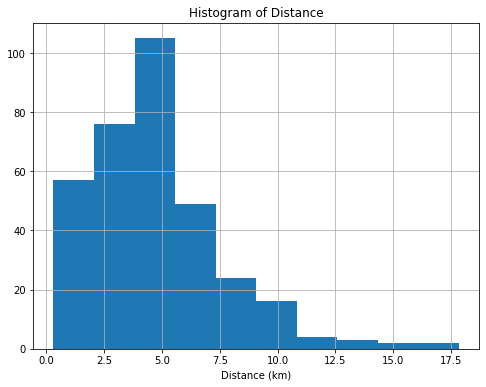

In [60]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Distance')
plt.xlabel('Distance (km)')
plt.grid()
plt.hist(rundata['Distance'])
plt.show()

In [61]:
rundata['Distance'].value_counts().head(10)

4.83    27
6.44    23
8.05    16
3.22    13
5.01    12
5.00     8
3.00     7
4.00     5
1.00     5
4.02     4
Name: Distance, dtype: int64

## Histogram of calories

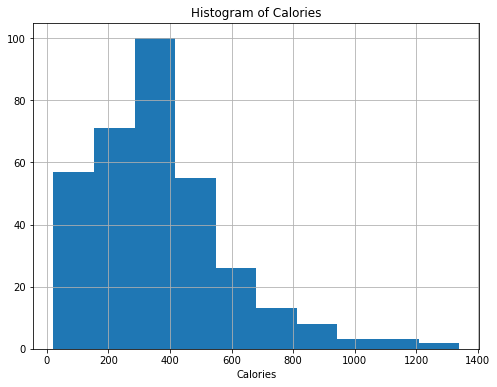

In [62]:
plt.figure(figsize=(8,6))
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.grid()
plt.hist(rundata['Calories'])
plt.show()

## Average pace by place, hour of day, and day of week

<AxesSubplot:title={'center':'Average Pace by day of week'}>

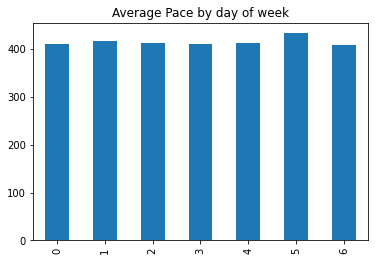

In [128]:
rundata.groupby('Day_of_week',as_index=False)['Avg_pace_secs'].mean().plot.bar(legend=False,title='Average Pace by day of week')

<AxesSubplot:title={'center':'Pace by place of run'}, xlabel='Place'>

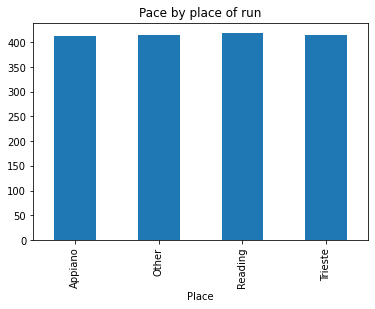

In [64]:
rundata.groupby('Place',as_index=False)['Avg_pace_secs'].mean().plot.bar(x='Place',legend=False,title='Pace by place of run')

<AxesSubplot:title={'center':'Pace by hour of day'}, xlabel='Hour_of_day'>

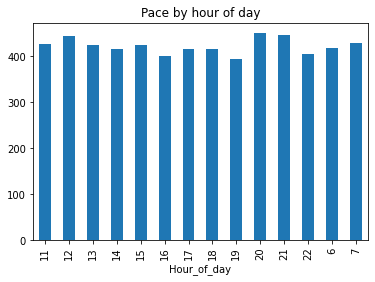

In [65]:
rundata.groupby('Hour_of_day',as_index=False)['Avg_pace_secs'].mean().plot.bar(x = 'Hour_of_day',legend=False,title='Pace by hour of day')

# Summaries

## Fastest runs

In [66]:
def print_best_perf(data: pd.DataFrame,distance: float, n=int):
    """
    Function that prints best performances based on distance and number of runs
    @data: dataset
    @param distance: Distance of the run
    @param n: number of top performances
    """
    print('Fastest {}k runs: '.format(distance))
    print()
    print(data[(data['Distance']<=distance+0.01) & (data['Distance']>=distance-0.01)].sort_values(by=['Avg_pace_secs']).head(n)[['Date','Distance','Time','Avg Pace']])
    print()


In [67]:
print_best_perf(rundata,6.44,3)

Fastest 6.44k runs: 

                   Date  Distance      Time Avg Pace
303 2022-03-24 19:00:49      6.44  00:41:14     6:24
183 2021-08-23 17:08:37      6.44  00:41:22     6:26
269 2022-01-20 18:35:48      6.44  00:42:07     6:33



In [68]:
main_distances = [3.22,4.83,5,6.44,8.05,10]

In [69]:
for i in main_distances:
    print_best_perf(rundata,i,3)

Fastest 3.22k runs: 

                   Date  Distance      Time Avg Pace
226 2021-11-04 19:22:22      3.22  00:19:43     6:08
243 2021-12-02 18:09:48      3.22  00:20:15     6:18
235 2021-11-18 18:15:35      3.22  00:20:24     6:20

Fastest 4.83k runs: 

                   Date  Distance      Time Avg Pace
255 2021-12-23 17:57:55      4.83  00:28:41     5:57
297 2022-03-14 18:37:06      4.83  00:29:57     6:12
261 2022-01-03 16:32:55      4.83  00:30:11     6:15

Fastest 5k runs: 

                   Date  Distance      Time Avg Pace
299 2022-03-17 18:24:05      5.01  00:30:50     6:09
325 2022-05-18 17:53:26      5.01  00:32:01     6:24
121 2021-04-21 18:50:58      5.00  00:32:31     6:30

Fastest 6.44k runs: 

                   Date  Distance      Time Avg Pace
303 2022-03-24 19:00:49      6.44  00:41:14     6:24
183 2021-08-23 17:08:37      6.44  00:41:22     6:26
269 2022-01-20 18:35:48      6.44  00:42:07     6:33

Fastest 8.05k runs: 

                   Date  Distance      Ti

## Totals and averages

In [70]:
print('Total calories burnt: ' + str(rundata['Calories'].sum()))
print('Total distance run: ' + str(round(rundata['Distance'].sum(),1)))
print('Average pace (km): ' + str(round(rundata['Avg_pace_secs'].mean(),2)))
print('Average heart rate: ' + str(round(rundata['Avg HR'].mean(),2)))
print('Longest distance run: ' + str(rundata['Distance'].max()))

Total calories burnt: 123031
Total distance run: 1613.3
Average pace (km): 417.03
Average heart rate: 156.37
Longest distance run: 17.85


# Model

Let's try and determine which factors can predicts a good performance by using historical data. A good performance can be defined as a fast run, where "fast" is defined as a run with an average pace in a certain percentile, or perhaps a best performance given a certain distance.

## Imports sklearn packages

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import sklearn.preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

# Build a RF regressor to predict run pace

In [78]:
rf_regressor = RandomForestRegressor()

In [100]:
regressor_features = ['Place','Distance','Total Descent','Day_of_week','Hour_of_day', 'Month', 'Pace_MA_7', 
                      'Distance_MA_30', 'Distance_MA_60', 'Avg_HR_MA_30','Avg_pace_secs']

# Train test split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(rundata[regressor_features[:-1]], rundata['Avg_pace_secs']
                                                    , test_size=0.20, random_state=8)

In [102]:
numeric_features = X_train.select_dtypes(include=['int64','int32', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [103]:
numeric_features

Index(['Distance', 'Total Descent', 'Pace_MA_7', 'Distance_MA_30',
       'Distance_MA_60', 'Avg_HR_MA_30'],
      dtype='object')

In [104]:
categorical_features

Index(['Place', 'Day_of_week', 'Hour_of_day', 'Month'], dtype='object')

In [105]:
numeric_transformer = Pipeline(steps=[
      ('imputer',SimpleImputer(missing_values=np.nan, strategy='mean')),
      ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
      ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [106]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features),
    #("title_tfidf", TfidfVectorizer(min_df=1, stop_words="english"), "Title"),
]) 

In [107]:
param_grid = {
    'rf_regressor__n_estimators':[5,10,20],
    'rf_regressor__max_depth':[3,5,7],
    'rf_regressor__min_samples_split':[3,4,5]
}

In [108]:
#from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('rf_regressor',rf_regressor)
           ])

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [110]:
mse_scorer = make_scorer(mean_squared_error)

In [111]:
grid_pipeline = GridSearchCV(pipeline, param_grid, scoring=mse_scorer, return_train_score= True)

In [112]:
grid_pipeline.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Distance', 'Total Descent', 'Pace_MA_7', 'Distance_MA_30',
       'Distance_MA_60', 'Avg_HR_MA_30'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Place', 'Day_of_week', 'Hour_of_day', 'Month'], dtype='object'))])),
                                       ('rf_regressor',
                                        RandomForestRegressor())]),
             param_grid={'rf_regressor__max_depth': [3, 5, 7],
                         'rf_regressor__min_samples_split': [3, 4, 5],
                         'rf_regressor__n_estimators': [5, 10, 20]},
             return_train_score=True, scoring=make_scorer(mean_squared_error))

In [113]:
grid_pipeline.best_params_

{'rf_regressor__max_depth': 5,
 'rf_regressor__min_samples_split': 4,
 'rf_regressor__n_estimators': 5}

In [114]:
y_pred = grid_pipeline.best_estimator_.predict(X_test)

In [115]:
preds = pd.DataFrame(y_pred)
preds = preds.rename(columns={0:'Preds'})

In [116]:
actuals = pd.DataFrame(y_test).rename(columns={'Avg_pace_secs':'Actuals'}).reset_index(drop=True)

In [117]:
pred_df = pd.concat([actuals, preds],axis=1)

In [118]:
pred_df

,Actuals,Preds
0,355,374.202353
1,425,398.401148
2,420,423.515518
3,399,418.880784
4,380,410.518891
...,...,...
63,457,420.385088
64,378,410.642579
65,413,412.891544
66,426,416.624878


In [119]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  19.033174


In [120]:
feature_importances = sorted(zip(np.round(grid_pipeline.best_estimator_.named_steps.rf_regressor.feature_importances_*100, 3),
                                 rundata[regressor_features[:-1]].columns), reverse=True) 
feature_importances = pd.DataFrame(feature_importances)
feature_importances.columns = ['score','feature']
feature_importances

,score,feature
0,35.961,Place
1,21.031,Total Descent
2,11.278,Day_of_week
3,7.962,Distance
4,6.863,Hour_of_day
5,5.785,Month
6,0.000,Pace_MA_7
7,0.000,Distance_MA_60
8,0.000,Distance_MA_30
9,0.000,Avg_HR_MA_30
